In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
appliance = {
    'WashingMachine': [0, 1250],
    'Fridge':         [1550, 3600],  # 1550, 3600
    'Kettle':         [3700, 4200],
    'Microwave':      [28700, 28800],
    'Dishwasher':     [7410, 8710]
}

def file_filter(f):
    if f[-4:] in ['.npy']:
        return True
    else:
        return False

def NILMPLOT(folder, model):
    files = os.listdir(folder)
    files = sorted(list(filter(file_filter, files)))
    for i_npy in files:
        
        if i_npy.split('_')[0] == 'results':
            # print('====> Save ALL')
            break

        app_name = i_npy.split('_')[-1].split('.')[0]

        dis_path = os.path.join(folder, i_npy)
        
        load_npy = np.load(dis_path)

        x_total       = load_npy[0].reshape(-1)
        y_total_pred  = load_npy[1].reshape(-1)
        y_total_true  = load_npy[2].reshape(-1)
        start = appliance[app_name][0]
        end = appliance[app_name][1]
        # plt.plot(x_total[start:end], label='input')
        plt.figure(figsize=(6, 1.5))
        plt.plot(y_total_true[start:end], label='GroundTruth', linewidth=2.)
        plt.plot(y_total_pred[start:end], label=model, linestyle='--', linewidth=2.)
        plt.legend(loc='upper right', prop = {'size':12})
        plt.xticks([])
        plt.yticks([])
        # plt.title(app_name)
        print(app_name)
        # plt.savefig(os.path.join(folder, i_npy[:-4]) + '.png')
        plt.show()
        plt.close()

     Appliance           MAE         MAE_on        EpD           PR           RE           F1          Acc          SAE          RMSE         EAC          NDE     
   WashingMachine     10.738991    121.252122   76.085758     0.844114     0.956512     0.896805     0.985965     0.028070    71.082888     0.892398     0.064431  
     Dishwasher        4.669468    117.608270   56.952731     0.965730     0.824729     0.889677     0.986941     0.026117    63.570939     0.942278     0.044974  
       Kettle          2.868683    218.466632   39.400131     0.996702     0.833885     0.908053     0.966839     0.066322    55.655581     0.939487     0.055379  
       Fridge          7.427922    14.595258    43.632932     0.933030     0.935249     0.934138     0.979089     0.041822    20.804634     0.902755     0.110426  
     Microwave         3.724425    289.618843   36.671009     0.823288     0.905405     0.862397     0.990765     0.018469    56.809057     0.850273     0.171006  
      Average   

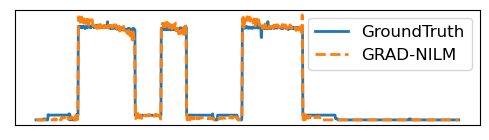

Fridge


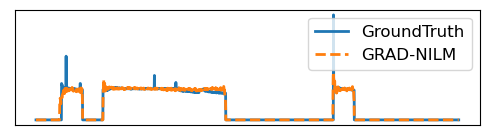

Kettle


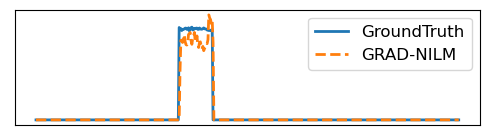

Microwave


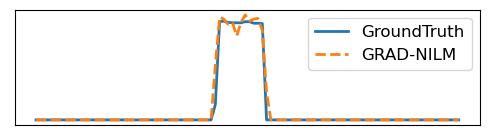

WashingMachine


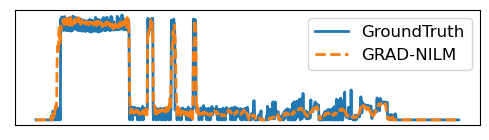

In [11]:
## 真实数据集
path = './'
a0 = a1 = a2 = a3 = a4 = a5 = a6 = a7 = a8 = a9 = a10 = 0
e = 0
print('{:^20s} {:^12s} {:^12s} {:^12s} {:^12s} {:^12s} {:^12s} {:^12s} {:^12s} {:^12s} {:^12s} {:^12s}'.format('Appliance','MAE', 'MAE_on', 'EpD', 'PR', 'RE', 'F1', 'Acc', 'SAE', 'RMSE', 'EAC', 'NDE'))
for index_app, test_app in enumerate(['WashingMachine', 'Dishwasher', 'Kettle', 'Fridge', 'Microwave']):
    app = np.load(os.path.join(path, f'results_median_{test_app}.npy'), allow_pickle=True)
    print('{:^20s} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f}'.format(test_app, app[0][e], app[1][e], app[2][e][0], app[3][e],\
                                         app[4][e], app[5][e], app[6][e], app[7][e], app[8][e], app[9][e], app[10][e]))
    a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10 = a0 + app[0][e], a1 + app[1][e], a2 + app[2][e][0], a3 + app[3][e], a4 + app[4][e], a5 + app[5][e], a6 + app[6][e], a7 + app[7][e], a8 + app[8][e], a7 + app[9][e], a7 + app[10][e]
print('{:^20s} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f}'.format('Average', a0/5,a1/5,a2/5,a3/5,a4/5,a5/5,a6/5,a7/5,a8/5,a9/5,a10/5))
NILMPLOT(path, 'GRAD-NILM')